# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', on_bad_lines='error', )
print(internetAd.info())
internetAd.head(20)

C:\Users\louis\AppData\Local\Temp\ipykernel_20464\897036167.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\louis\AppData\Local\Temp\ipykernel_20464\897036167.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', on_bad_lines='error', )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [2]:
import numpy as np
# Check for missing values
# using a regular expression to find all the instances of ? with varying whitespace
internetAd.replace(to_replace='\s*\?', value=np.nan, regex=True, inplace=True)
internetAd['Target'].replace({'ad.': 1, 'nonad.': 0}, inplace=True)
internetAd.head(20)

C:\Users\louis\AppData\Local\Temp\ipykernel_20464\2104180715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  internetAd['Target'].replace({'ad.': 1, 'nonad.': 0}, inplace=True)
C:\Users\louis\AppData\Local\Temp\ipykernel_20464\2104180715.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  intern

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Question 1.1 Part 2: Check that replacing worked

In [3]:
# There should be no values in the dataframe that contain '?'
# The only possible values in the 'Target' column should be 0 or 1
count = internetAd[internetAd.apply(lambda x: x.astype(str).str.contains('\?')).any(axis=1)].shape[0]
assert(count==0) # a count of questions marks should be 0
distinct_values = internetAd['Target'].unique()
print(distinct_values)

[1 0]


Make Sure that "height","width","aratio" is type - float

In [4]:
internetAd['height'] = internetAd['height'].astype(float)
internetAd['width'] = internetAd['width'].astype(float)
internetAd['aratio'] = internetAd['aratio'].astype(float)
# I also added local since I can't get stats below if local isn't type float.
internetAd['local'] = internetAd['local'].astype(float)


Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [5]:
internetAd[['height', 'width', 'aratio', 'local']].describe()
# This gives us the median which we again compute later.

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [6]:
#Mean
print(f'Mean of height column: {internetAd["height"].mean()}')
print(f'Mean of width column: {internetAd["width"].mean()}')
print(f'Mean of aratio column: {internetAd["aratio"].mean()}')
print(f'Mean of local column: {internetAd["local"].mean()}')

#Median
median_height = internetAd["height"].median()
median_width = internetAd["width"].median()
median_aratio = internetAd["aratio"].median()
median_local = internetAd["local"].median()
print(f'Median of height column: {median_height}')
print(f'Median of width column: {median_width}')
print(f'Median of aratio column: {median_aratio}')
print(f'Median of local column: {median_local}')

#Mode
print(f'Mode of height column: {internetAd["height"].mode()}')
print(f'Mode of width column: {internetAd["width"].mode()}')
print(f'Mode of aratio column: {internetAd["aratio"].mode()}')
print(f'Mode of local column: {internetAd["local"].mode()}')

Mean of height column: 64.02188552188552
Mean of width column: 155.3448275862069
Mean of aratio column: 3.9119525116082734
Mean of local column: 0.7671568627450981
Median of height column: 51.0
Median of width column: 110.0
Median of aratio column: 2.102
Median of local column: 1.0
Mode of height column: 0    60.0
Name: height, dtype: float64
Mode of width column: 0    468.0
Name: width, dtype: float64
Mode of aratio column: 0    1.0
Name: aratio, dtype: float64
Mode of local column: 0    1.0
Name: local, dtype: float64


Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [7]:
#nan_height_rows = internetAd[internetAd['height'].isna()]
#print(nan_height_rows)

internetAd['height'].fillna(median_height, inplace=True)
internetAd['width'].fillna(median_width, inplace=True)
internetAd['aratio'].fillna(median_aratio, inplace=True)
internetAd['local'].fillna(median_local, inplace=True)

internetAd[['height', 'width', 'aratio', 'local']].describe()


C:\Users\louis\AppData\Local\Temp\ipykernel_20464\299340390.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  internetAd['height'].fillna(median_height, inplace=True)
C:\Users\louis\AppData\Local\Temp\ipykernel_20464\299340390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,height,width,aratio,local
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,60.435804,142.885026,3.409648,0.768222
std,47.064669,112.564585,5.199722,0.422032
min,1.000000,1.000000,0.001500,0.000000
25%,32.500000,90.000000,1.279400,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,61.000000,144.000000,3.900000,1.000000
max,640.000000,640.000000,60.000000,1.000000


Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

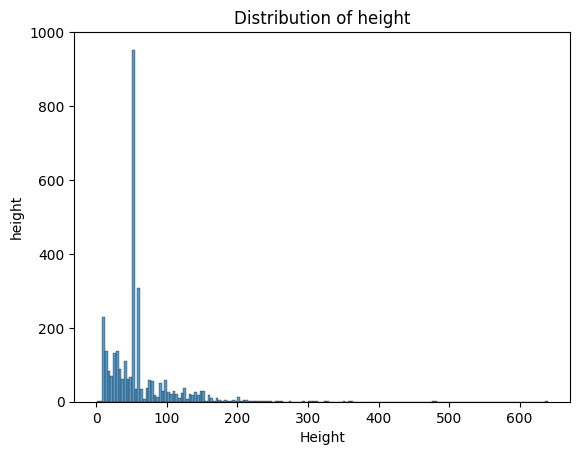

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dimension = 'height'
sns.histplot(internetAd[dimension])
plt.xlabel(dimension.capitalize())
plt.ylabel(dimension)
plt.title(f'Distribution of {dimension}')
plt.show()

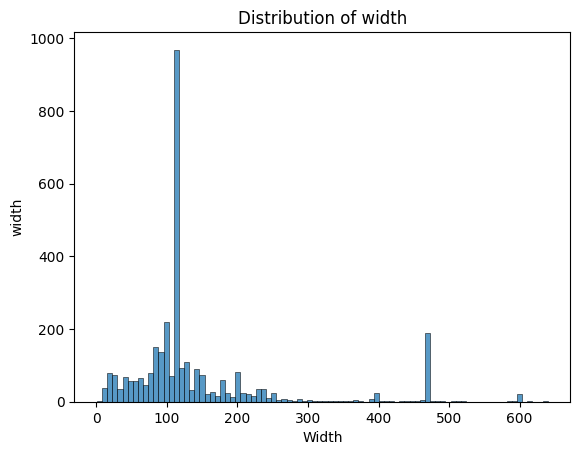

In [9]:
dimension = 'width'
sns.histplot(internetAd[dimension])
plt.xlabel(dimension.capitalize())
plt.ylabel(dimension)
plt.title(f'Distribution of {dimension}')
plt.show()

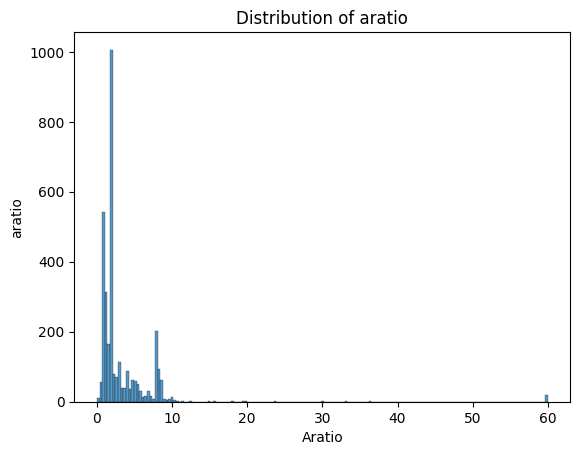

In [10]:
dimension = 'aratio'
sns.histplot(internetAd[dimension])
plt.xlabel(dimension.capitalize())
plt.ylabel(dimension)
plt.title(f'Distribution of {dimension}')
plt.show()

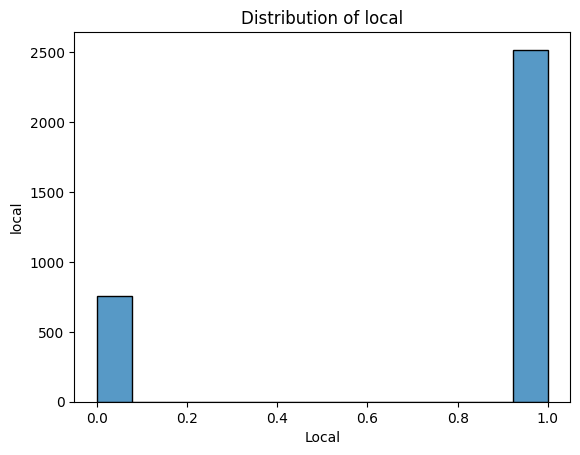

In [11]:
dimension = 'local'
sns.histplot(internetAd[dimension])
plt.xlabel(dimension.capitalize())
plt.ylabel(dimension)
plt.title(f'Distribution of {dimension}')
plt.show()

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [12]:
from sklearn.model_selection import train_test_split
X = internetAd[['height', 'width', 'aratio', 'local']]
y = internetAd['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# yep looks like a 1/3:2/3 split

(2196, 4)
(2196,)
(1083, 4)
(1083,)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [14]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_standard_scaled = X_train.copy()
X_test_standard_scaled = X_test.copy()

#fill this in
X_train_standard_scaled = scaler.transform(X_train)
X_test_standard_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# defines a function that we will use a lot
# prints out the stats for a model
# Stats printed include accuracy, confusion matrix, precision, and recall
def print_stats(predictions, y_test, model_info: str):
    print(f'Statistics for model: {model_info}')
    print('accuracy score: ', accuracy_score(y_test, predictions))
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

    precision = precision_score(y_test, predictions)
    print('Precision: ', precision)

    recall = recall_score(y_test, predictions)
    print('Recall: ', recall)
    print('\n')

Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [15]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model using unscaled data
logreg = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

# Create the logistic regression model using minmax scaled data
logreg_minmax_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
logreg_minmax_scaled.fit(X_train_minmax_scaled, y_train)
predictions_minmax_scaled = logreg_minmax_scaled.predict(X_test_minmax_scaled)



accuracy score no scaling 0.8347183748845799
accuracy score with min_max scaling 0.8162511542012927


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
# Print the stats for both models above
print_stats(predictions, y_test, 'unscaled')
print_stats(predictions_minmax_scaled, y_test, 'Logistic Regression with MinMax Scaled Data')


Statistics for model: unscaled
accuracy score:  0.8347183748845799
True positive =  810
False positive =  106
False negative =  73
True negative =  94
Precision:  0.47
Recall:  0.562874251497006


Statistics for model: Logistic Regression with MinMax Scaled Data
accuracy score:  0.8319482917820868
True positive =  806
False positive =  110
False negative =  72
True negative =  95
Precision:  0.4634146341463415
Recall:  0.5688622754491018




Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [22]:
#penalty='l1'
# Create the logistic regression model using minmax scaled data
logreg_minmax_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='l1', C=0.1)
logreg_minmax_scaled.fit(X_train_minmax_scaled, y_train)
predictions_minmax_scaled = logreg_minmax_scaled.predict(X_test_minmax_scaled)
print_stats(predictions_minmax_scaled, y_test, 'Logistic Regression with MinMax Scaled Data and L1 Penalty')


Statistics for model: Logistic Regression with MinMax Scaled Data and L1 Penalty
accuracy score:  0.8254847645429363
True positive =  798
False positive =  118
False negative =  71
True negative =  96
Precision:  0.4485981308411215
Recall:  0.5748502994011976




In [23]:
#penalty='elasticnet' with l1_ratio=0.5
# Create the logistic regression model using minmax scaled data
logreg_minmax_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.5, C=0.1)
logreg_minmax_scaled.fit(X_train_minmax_scaled, y_train)
predictions_minmax_scaled = logreg_minmax_scaled.predict(X_test_minmax_scaled)
print_stats(predictions_minmax_scaled, y_test, 'Logistic Regression with MinMax Scaled Data and Elasticnet Penalty with l1_ratio=0.5')


Statistics for model: Logistic Regression with MinMax Scaled Data and Elasticnet Penalty with l1_ratio=0.5
accuracy score:  0.8319482917820868
True positive =  806
False positive =  110
False negative =  72
True negative =  95
Precision:  0.4634146341463415
Recall:  0.5688622754491018




Question 5: How do the three models compare? How did you make the comparison?

I looked at the 4 metrics we were asked to compute

|          | No scaling | MinMax   | MM + l1  | MM+elastic|
| -------- | --------   | -------- | -------- | --------  |
| Accuracy | 0.8347     | 0.8162   | 0.8264   | 0.8319    |
| Precision|  N/A       | 0.4279   | 0.4507   | 0.4634    |
| Recall   |  N/A       | 0.5688   | 0.5748   | 0.5688    |

From this you can see that the MinMax data with elastic penalty in the log regression was best

However, out of curiosity, I also tried a LogReg model on the unscaled data set and that
achieved the highest accuracy of all at 83.47%, just slightly beating MM scaling + elastic at 83.19%

Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

In [19]:


# Create the logistic regression model using standard scaled data
logreg_standard_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
logreg_standard_scaled.fit(X_train_standard_scaled, y_train)
predictions_standard_scaled = logreg_standard_scaled.predict(X_test_standard_scaled)
print_stats(predictions_standard_scaled, y_test, 'standard scaled')

Statistics for model: standard scaled
accuracy score:  0.8162511542012927
True positive =  789
False positive =  127
False negative =  72
True negative =  95
Precision:  0.42792792792792794
Recall:  0.5688622754491018




In [20]:
#penalty='l1'
logreg_standard_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='l1', C=0.1)
logreg_standard_scaled.fit(X_train_standard_scaled, y_train)
predictions_standard_scaled = logreg_standard_scaled.predict(X_test_standard_scaled)
print_stats(predictions_standard_scaled, y_test, 'standard scaled with l1 penalty')

#penalty='elasticnet' with l1_ratio=0.5
logreg_standard_scaled = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.5)
logreg_standard_scaled.fit(X_train_standard_scaled, y_train)
predictions_standard_scaled = logreg_standard_scaled.predict(X_test_standard_scaled)
print_stats(predictions_standard_scaled, y_test, 'standard scaled with elasticnet penalty')

Statistics for model: standard scaled with l1 penalty
accuracy score:  0.8254847645429363
True positive =  798
False positive =  118
False negative =  71
True negative =  96
Precision:  0.4485981308411215
Recall:  0.5748502994011976


Statistics for model: standard scaled with elasticnet penalty
accuracy score:  0.8125577100646353
True positive =  788
False positive =  128
False negative =  75
True negative =  92
Precision:  0.41818181818181815
Recall:  0.5508982035928144




I'm using the same table as before, using the 3 metrics

|          | No scaling | std scale   | SS + l1  | SS+elastic|
| -------- | --------   | --------    | -------- | --------  |
| Accuracy | 0.8347     | 0.8162      | 0.8254   | 0.8125    |
| Precision|  N/A       | 0.4279      | 0.4485   | 0.4181    |
| Recall   |  N/A       | 0.5688      | 0.5748   | 0.5508    |

Without using different penalties the MinMax scaled and Standard Scaled data performed identically in the 3 metrics.
None of the other two penalty methods, coupled with standard scaling performed better than the best MinMax model.
The best model trained on standard scaled data had accuracy of 82.54%. The best MinMax model was 83.19%.

And once again, none of the models had better accuracy than unscaled data trained on the default linear regression model. I am perplexed why in the last two exercises, the simplest models seemed to perform best. I exected that as my model became more sophisticated the accuracy would improve.